# Importing Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Importing Neccesary Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import random
from collections import defaultdict
from pprint import pprint
from collections import Counter
from nltk.corpus import stopwords
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Prevent future/deprecation warnings from showing in output

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings(action='ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
!pip install WordCloud
from wordcloud import WordCloud

In [4]:
import timeit
import time
start_time = time.time()

# Loading Data

In [5]:
start = timeit.default_timer()
df = pd.read_csv('My Drive/Sos/train.csv',encoding = "ISO-8859-1")

# Visualizing Data

In [6]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [7]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


Text(0.5, 1.0, 'Bar plot of sentiments')

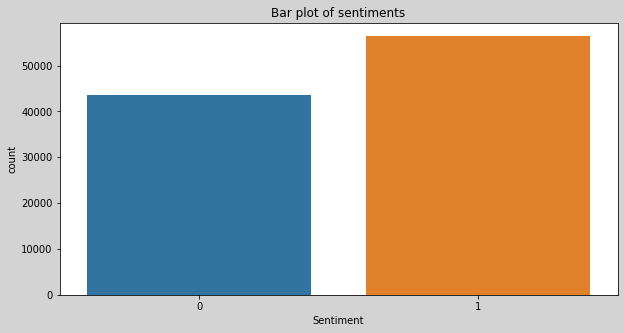

In [9]:
plt.figure(figsize = (10,5),facecolor='lightgrey', edgecolor='red')
sns.countplot(df['Sentiment'])
sns.set(style="darkgrid")
plt.title("Bar plot of sentiments")

# Data Cleaning, Lamentization

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words= set(stopwords.words('english'))

In [12]:
len(stop_words)

179

In [13]:
def clean_text(txts):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', txts)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop_words])
#     d
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [14]:
clean_tweets = [clean_text(doc) for doc in df['SentimentText']]
sentences = [' '.join(r) for r in clean_tweets] 

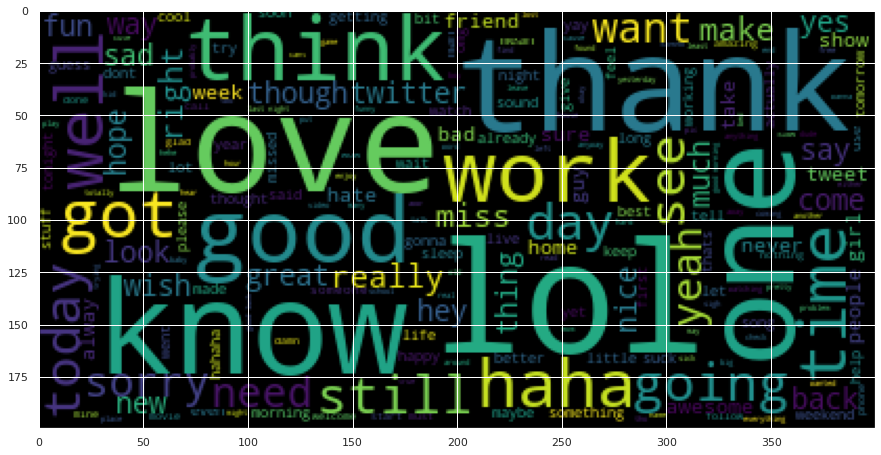

In [15]:
sentences_as_one_string = ' '.join(sentences)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [16]:
df['cleaned_tweets']=sentences
df.head()

,ItemID,Sentiment,SentimentText,cleaned_tweets
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry dentist since suposed ge...
4,5,0,i think mi bf is cheating on me!!! ...,think cheating


In [17]:
def top_words(data):
        words_list = data.split(' ')
        counts = Counter(words_list)
        top_words = counts.most_common(20)
        length_of_list = len(top_words)
        index = np.arange(length_of_list)
        print(top_words)
        count_values = [x[1] for x in top_words]
        count_words = [x[0] for x in top_words]
        fig = plt.figure(figsize = (16,9))
        bar_width = 0.4
        rects1 = plt.bar(index, count_values)
        plt.xticks(index + bar_width, count_words, rotation=0)
        plt.show()

Top words in Positive Sentiment
[('good', 4239), ('thanks', 3577), ('love', 3393), ('lol', 3308), ('like', 3157), ('get', 2677), ('know', 2446), ('day', 2092), ('one', 2065), ('well', 2001), ('haha', 1991), ('see', 1885), ('great', 1790), ('time', 1730), ('think', 1589), ('hope', 1552), ('thank', 1489), ('got', 1462), ('yeah', 1306), ('really', 1294)]


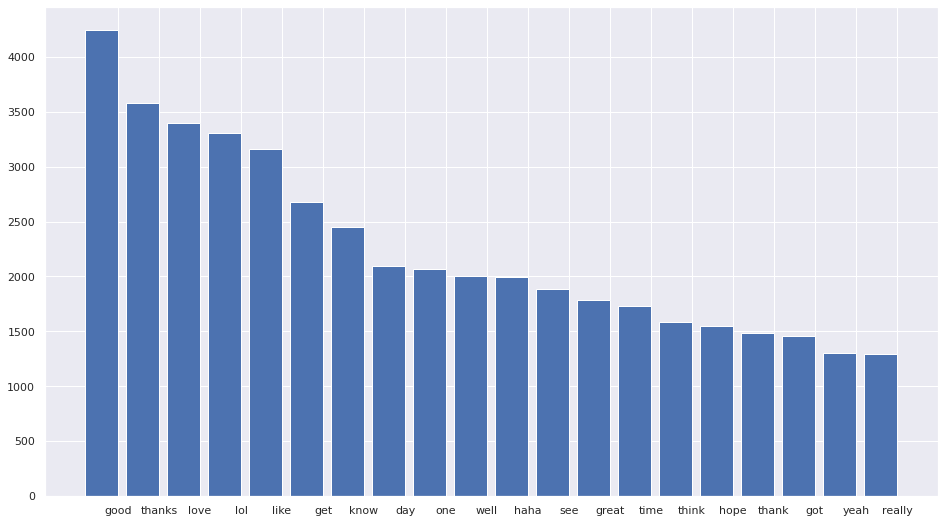

In [18]:
train_positive_sentiment = df[df.Sentiment == 1]
positive_words = ' '.join(train_positive_sentiment['cleaned_tweets'])
print("Top words in Positive Sentiment")
top_words(positive_words)

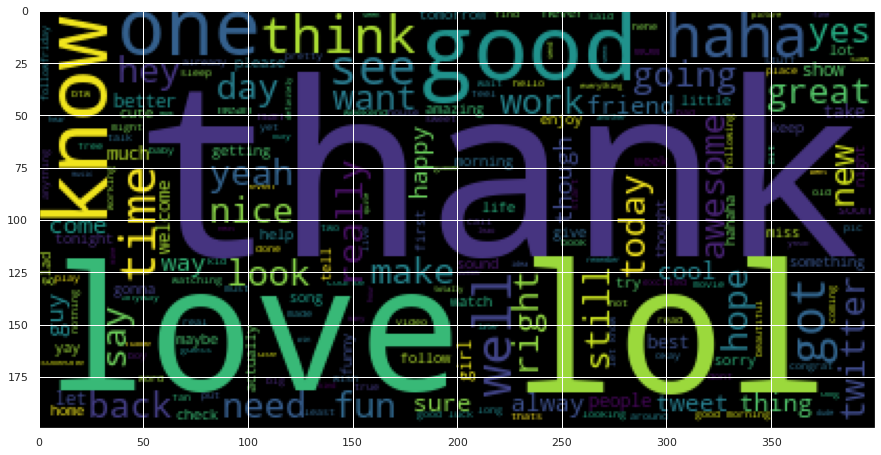

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_words))

Top words in Negative Sentiment
[('get', 2623), ('like', 2373), ('know', 2160), ('lol', 2084), ('sorry', 2048), ('work', 1676), ('good', 1668), ('one', 1665), ('miss', 1616), ('got', 1562), ('sad', 1501), ('really', 1491), ('still', 1431), ('going', 1417), ('day', 1399), ('want', 1385), ('see', 1369), ('time', 1350), ('think', 1294), ('wish', 1226)]


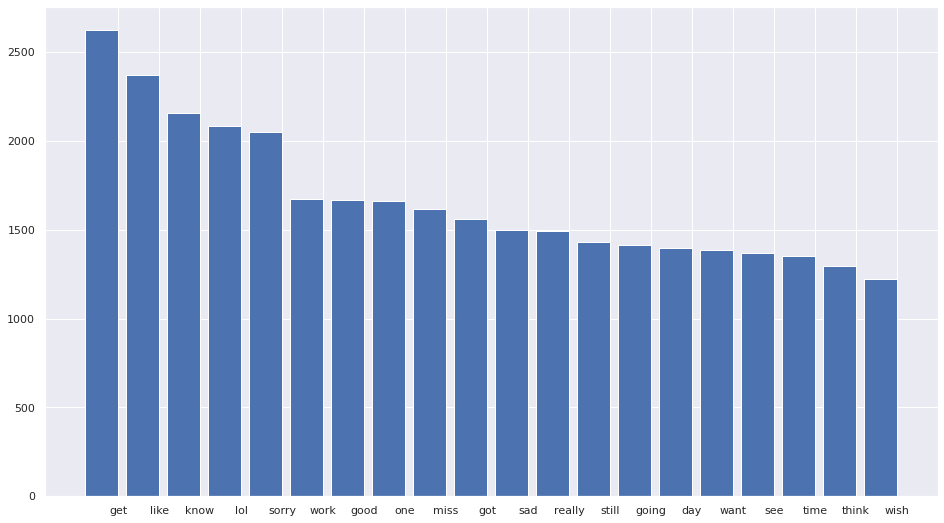

In [20]:
train_positive_sentiment = df[df.Sentiment == 0]
negative_words = ' '.join(train_positive_sentiment['cleaned_tweets'])
print("Top words in Negative Sentiment")
top_words(negative_words)

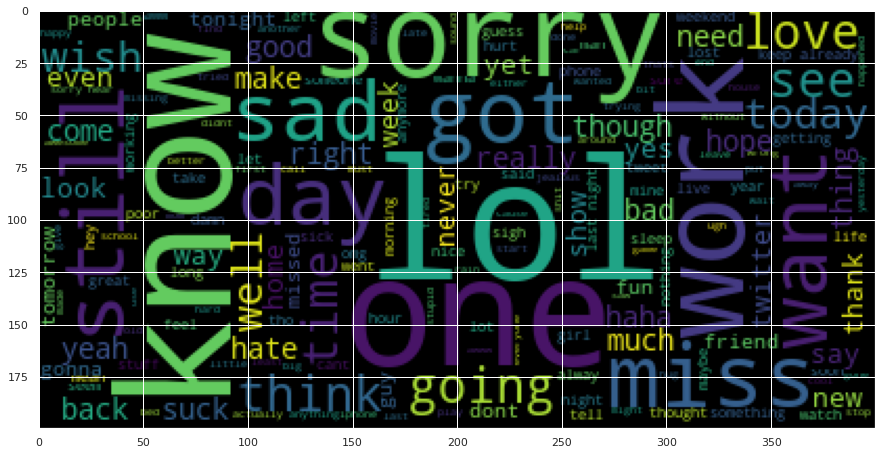

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_words))

### Train Test Split

In [22]:

X = df.cleaned_tweets
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Vectorization / Tokenization

In [23]:
vect = CountVectorizer(max_features=1000, binary=True)
X_train_vect = vect.fit_transform(X_train)

In [24]:
sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [25]:
X_train_res.shape, y_train_res.shape

((90352, 1000), (90352,))

In [26]:
unique, counts = np.unique(y_train_res, return_counts=True)

In [27]:
print(unique, counts)

[0 1] [45176 45176]


# Model Fitting

In [28]:

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.7183570922613777

In [29]:
X_test_vect = vect.transform(X_test)

In [30]:
y_pred = nb.predict(X_test_vect)

y_pred

array([0, 1, 0, ..., 0, 0, 1])

# Model Performance

In [31]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))

Accuracy: 71.16%

F1 Score: 72.93


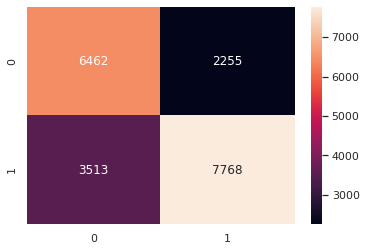

In [32]:

c=confusion_matrix(y_test,y_pred)
sns.heatmap(c,annot=True,fmt='d')

In [33]:
stop = timeit.default_timer()

print (stop - start)

elapsed_time = time.time() - start_time
print(time.strftime("Time Taken = Hours %H: minuts %M: seconds %S", time.gmtime(elapsed_time)))

46.07202671500045
Time Taken = Hours 00: minuts 00: seconds 46
